# Classwork

This is just a way for me to deepen my knowledge and mastrey of how far I've gone to TensorFlow.

For this, I'm going to practice with the Medical Cost Personal Dataset, which is a regression problem in machine learning, containing individual's information, including their demographics, habits, health conditions, medical insurance charges, among others. The goal here is to predict medical insurance cost based on the given features.

**Key Features in the Dataset**
1. **age**: Age of the individual (numeric)
2. **sex**: Gender of the individual (categorical: `male` or `female`)
3. **bmi**: Body Mass Index (numeric) - a measure of body fat based on height and weight.
4. **children**: Number of dependents (numeric)
5. **smoker**: Whether the individual is a smaoker (categorical: `yes` or `no`)
6. **region**: Residential region in the United States (categorical: `northeast`, `northwest`, `southeast`, `southwest`).
7. **charges***: Medical insurance cost (numeric, target variable).


In [1]:
# Import the necessary tools
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_keras as keras
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## 1. Importing the data and making it ready for deep learning

To start with, we will have to import the data. Once is the data is imported, we will do the following:
1. Check for any missing data.
2. Preprocess the data
3. Split the data into features (X) and labels (y).
4. Divide the features and labels into training and test set.

In [2]:
# 0.0 Import the data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

# 0.1 View the dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 1.0 Check for any missing data
insurance.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


For the fact that there is no missing data, we can start preprocessing them. There are two main forms of preprocessing, namely normalization and standardization. When it comes to scaling values, neural networks tend to prefer normalization

In [4]:
# 2. Preprocess the data

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # We are turning the values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # These are categorical data that will be one hot encoded
)

In [5]:
# 3. Split the data into features (X) and labels (y).
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [6]:
# 4. Divide the features and labels into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal  = ct.transform(X_test)

## 2. Neural Network Construction

With the data normalized and one hot encoded, let's start building a neural network model on it

In [8]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model = keras.Sequential([
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=keras.losses.mae,
    optimizer=keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13161.9980 - mae: 13161.9980
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13153.9688 - mae: 13153.9688
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13133.6846 - mae: 13133.6846
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13090.6758 - mae: 13090.6758
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13013.5615 - mae: 13013.5615
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 12891.2188 - mae: 12891.2188
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12713.4941 - mae: 12713.4941
Epoch 8/100
34/34 [==============================] - 0s 9ms/step - loss: 12470.2715 - mae: 12470.2715
Epoch 9/100
34/34 [==============================] - 0s 12ms/step - loss: 12151.8672 - mae: 12151.8672
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 11753.0

In [9]:
# Evaluate our model
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3556.6685 - mae: 3556.6685


[3556.66845703125, 3556.66845703125]

## 3. Improve the model

Let's try improving the model by:
1. Modifying the learning rate
2. Train for longer

In [10]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = keras.Sequential([
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

# Compile the model
model_2.compile(
    loss=keras.losses.mae,
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# Fit the model
history = model_2.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 9331.0771 - mae: 9331.0771
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 4815.0674 - mae: 4815.0674
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 3636.7227 - mae: 3636.7227
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3636.0642 - mae: 3636.0642
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 3643.7400 - mae: 3643.7400
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3661.7524 - mae: 3661.7524
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3692.1367 - mae: 3692.1367
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3641.6912 - mae: 3641.6912
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3567.1145 - mae: 3567.1145
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3596.3909 - mae: 3596.3909

In [11]:
# Evaluate the model
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3448.8584 - mae: 3448.8584


[3448.8583984375, 3448.8583984375]

In [12]:
# Take a look at the first model
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3556.6685 - mae: 3556.6685


[3556.66845703125, 3556.66845703125]

As we can see, the second model performed better than the first one. Let's plot the loss curve on it

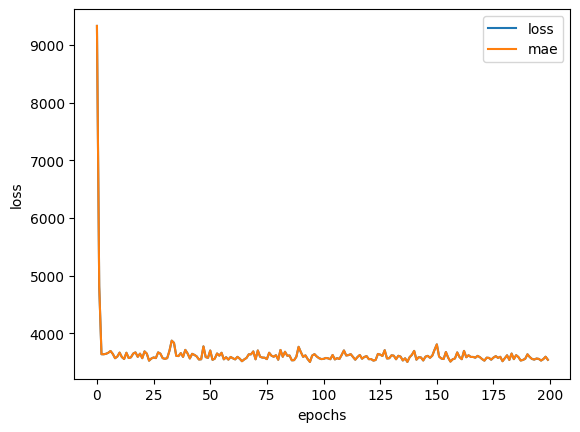

In [13]:
# plot history (aka loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");